<div style="text-align: center"> <h1>Association Rule Mining</h1> </div>
<img src='img3.png'/>

# Algorithm

## 1.Import the dataset<br>


<center><img src='dataimg.png' width=800px /></center>





## 2.Convert the dataset into matrix<br>

<center><img src='datamatimg.png' width=800px /></center>


## 3.Generate item sets such as l1 ,l2 ,l3 ,etc . . .<br>
<h3>Repeat Untill generated itemset is null</h3>

<div>
<ul>
    <li>For every items in previously generated itemset (initially Data set), Find power set </li>
    <li>Find support count for each itemset in generated itemset</li>
    <li>Discard itemset whose support count less than  min support count </li>
<ul/>
<div/>


## 4.Produce Rules From the Frequent Itemset<br>

## 5.Get the Strong Association Rules from Produced Rules<br>

## 6.Analyse the Rules and Visualize Data and Rules<br>


In [1]:
#importing modules
import numpy as np
import pandas as pd
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline

<center><h1>Import Dataset </center></h1>

In [2]:
#importing dataset
df = pd.read_csv('Market_Basket_Optimisation_1.csv')
minsup = 0.02
minconf = 0.5
N=len(df.values)
minsupcount = int(minsup * N)
FrequentItemsets= dict()
print(minsupcount)


10


In [3]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,...,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,2,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,green tea,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,497,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,498,cooking oil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,499,frozen vegetables,spaghetti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<center><h1>Convert Dataset into Matrix</center></h1>

In [4]:
def DataToMatrix(df):
    mat = {
            'id':[i for i in range(1,len(df)+1)]
    }
    
    l = set()
    for x in df.values:
        l=l.union(set(x[1:]))
    items = list(l)
    #print(items)
    for x in items:
        if str(x)=='nan':
            continue
        mat.update({x:[0 for i in range(1,len(df)+1)]})
    for i,x in enumerate(df.values):
        for y in x:
            if y in mat.keys():
                mat[y][i]=1

    df = pd.DataFrame(mat)
    df.to_csv('Market_Basket_Optimisation_Matrix.csv',index=False) 
    return df    

df = DataToMatrix(df)

In [5]:
df

,id,ground beef,gums,clothes accessories,vegetables mix,hand protein bar,parmesan cheese,mushroom cream sauce,fresh tuna,pancakes,...,avocado,bacon,spinach,frozen vegetables,carrots,fresh bread,nonfat milk,soda,turkey,eggplant
0,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,498,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,499,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<center><h1>Generate Frequent Item Sets </center></h1>

In [6]:
''' Functions related to Apriori and Generation of Frequent Itemsets''' 


def getSingleItemSets(a):
    res =[col for col in a.columns]
    return res


'''Caluculates suuport count for each item in the itemset'''
def getSupCount(data,a):
    supcount=[0 for i in range(len(a))]
    for i,x in enumerate(a):
        if type(x)==type(list()):
            d = pd.DataFrame()
            for k in x:
                d[k]=data[k]
                
            for k in d.values:
                if sum(k)==len(x):
                    supcount[i]+=1
        else:
            supcount[i] = sum(data[x].values)
                
    
    return supcount

#Prunes the itemset which has supcount less than minsupcount
def pruning(itemset,minsupcount = 3):
    #print(itemset)
    a=[]
    for x in itemset:
        if x[1]>=minsupcount:
            a.append(x)
    
    itemset = a[:]
    return pd.DataFrame(itemset)


#Generates The l Itemset
def getItemSet(data,l):
    #print(data.values)
    t = set()
    for x in data.values:
        #print(x,'++>',type(x[0]))
        t=t.union(set(x[0])) if  type(x[0])==type(list()) else t.union(set(x))
    
    filt = list(t)
                    
    #print('x',l,filt)
    data =filt[:]
    comb = combinations(data,l)
    res =[]
    for x in np.array(list(comb)):
        #print(x,"\n\n")
        res.append([y for y in x])
    return (res)#np.array(list(comb))
def generateItemset(df,data,minsupcount,l=1):
    if l==1:
        a = getSingleItemSets(data)
    else:
        a = getItemSet(data,l)
    supcount = getSupCount(df,a)
    itemset= []
    for i in range(len(a)):
        itemset.append([a[i],supcount[i]])
    itemset =pruning(itemset,minsupcount)
    return itemset



In [7]:
#Generate Frequent Itemsets
def GetFrequentItemSets(df,minsupcount):
    FrequentItemsets=dict()
    l=generateItemset(df.iloc[:,1:],df.iloc[:,1:],minsupcount,1)
    FrequentItemsets.update({'l1':l})
    i=1
    while list(l)!=[]:
        l = generateItemset(df.iloc[:,1:],FrequentItemsets['l'+str(i)].iloc[:,:1],minsupcount,i+1)
        i+=1
        FrequentItemsets.update({'l'+str(i):l})
    return FrequentItemsets

FrequentItemsets = GetFrequentItemSets(df,minsupcount)


In [11]:
FrequentItemsets['l'+str(len(FrequentItemsets)-1)]

,0,1
0,"[milk, chocolate, mineral water]",10
1,"[spaghetti, mineral water, eggs]",13


<center><h1>Produce Association Rules</center></h1>

In [12]:

#Finding Association Rules
def FindAssociationRules(df,itemset):
    global l1,l2
    rules = {
            'antecedent':[],'consequent':[]
            }
    items=[x[0] for x in itemset.values]
    
    for x in items:
        for i in range(len(x)):
            rules['antecedent'].append(x[i])
            rules['consequent'].append(x[:i]+x[i+1:])
            rules['consequent'].append(x[i])
            rules['antecedent'].append(x[:i]+x[i+1:])

    rules = pd.DataFrame(rules)
    def getNumerator(data,x):

        for i in range(len(data)):
            x.sort()
            y = data[i][:1][0]
            y.sort()
            if x==y:
                return data[i][:][1]

    def getDenomenator(data,x,k) :
            if k==1:
                return sum(data[x].values)
            else:
                d = pd.DataFrame()
                for i in x:
                    d[i]=data[i]
                s = 0
                for i in d.values:
                    if sum(i)==len(x):
                        s+=1
                return s
    confidences = []
    for x in rules.values:
        if type(x[0]) == type(list()):
            s = x[0:1][0].copy()
            
            s.extend([x[1]])
        else:
            s = list(x[0:1]).copy()
            s.extend(x[1])
        
        n=getNumerator(itemset.values,s)
        d = getDenomenator(df,x[0],2) if type(x[0]) == type(list()) else getDenomenator(df,x[0:1],1)
        if type(d)==type(np.array([1])):
            d=d[0]
            
        confidences.append(n/d)
    rules['confidences'] =confidences


    #Support
    supports = []
    for x in rules.values:
        n=getNumerator(itemset.values,s)
        supports.append(n/N)
    rules['supports'] =supports

    #Lift
    lifts = []
    for i in range(len(supports)):
        #print(getSupCount(df,[rules.consequent[i]])[0]/N)
        l = confidences[i]/(getSupCount(df,[rules.consequent[i]])[0]/N)
        lifts.append(l)
    
    rules['lifts'] = lifts
    
    return rules
      

In [13]:
rules = FindAssociationRules(df,FrequentItemsets[list(FrequentItemsets.keys())[-2]])


In [14]:
rules

,antecedent,consequent,confidences,supports,lifts
0,milk,"[chocolate, mineral water]",0.178571,0.026,3.306878
1,"[chocolate, mineral water]",milk,0.370370,0.026,3.306878
2,chocolate,"[milk, mineral water]",0.112360,0.026,2.808989
3,"[milk, mineral water]",chocolate,0.500000,0.026,2.808989
4,mineral water,"[milk, chocolate]",0.082645,0.026,1.796622
5,"[milk, chocolate]",mineral water,0.434783,0.026,1.796622
6,spaghetti,"[mineral water, eggs]",0.135417,0.026,2.256944
7,"[mineral water, eggs]",spaghetti,0.433333,0.026,2.256944
8,mineral water,"[spaghetti, eggs]",0.107438,0.026,2.335609
9,"[spaghetti, eggs]",mineral water,0.565217,0.026,2.335609


<center><h1>Find the Strong Association Rules </center></h1>

In [15]:
def FindStrongRules(rules,minconf):
    i =0
    while True:
        if i >= len(rules.values):
            break
        if rules.values[i][2] < minconf:
            rules.drop(rules.index[[i]],inplace=True)
            i-=1
        i+=1
    return rules

In [16]:
strongrules = FindStrongRules(rules.copy(),minconf)

In [17]:
strongrules

,antecedent,consequent,confidences,supports,lifts
3,"[milk, mineral water]",chocolate,0.500000,0.026,2.808989
9,"[spaghetti, eggs]",mineral water,0.565217,0.026,2.335609


In [18]:
FrequentItemsets['l3']

,0,1
0,"[chocolate, milk, mineral water]",10
1,"[eggs, mineral water, spaghetti]",13


<center><h1>Data Visualization </center></h1>

In [19]:
def plotItemsetSupcount(data):
    colors = ['red']
    names = ["Itemset"]
    x = data.iloc[:,:1].values
    y = data.iloc[:,1:].values
    xticks = [i[0] for i in x]
    xticks = list(np.array(xticks).T)
    fig, ax = plt.subplots()
    #print(list(np.array(xticks).T),y)
    
    pd.DataFrame(y, index=xticks, columns=names).plot.bar(color=colors, ax=ax)
    plt.show()


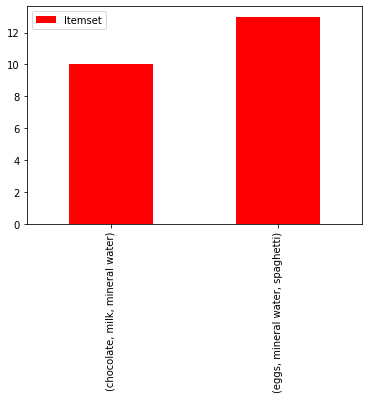

In [20]:
plotItemsetSupcount(FrequentItemsets['l'+str(len(FrequentItemsets)-1)])

In [21]:
def Plot_Rules_Conf(rules):
    plt.style.use('ggplot')
    confidences = [ i/10 for i in range(2,8)]
    no_of_rules = [ len(FindStrongRules(rules.copy(),c)) for c in confidences] 
    plt.xlabel('Confidence Level')
    plt.yticks(range(len(rules)*2))
    plt.ylabel('No of Rules')
    plt.title('Apriori Algorithm at Different confidence')
    plt.plot(confidences,no_of_rules)
    plt.scatter(confidences,no_of_rules)
    plt.show()

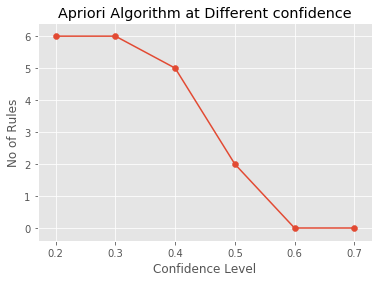

In [22]:
Plot_Rules_Conf(rules)

In [23]:
def Plot_Rules_Conf_Sup(df):
    
    plt.title('Apriori Algorithm at Different confidence')
    plt.style.use('ggplot')
    plt.xlabel('Confidence Level')
    plt.ylabel('No of Rules')
    plt.yticks(range(0,60,6))
    
    colour=['red','blue','orange','black','cyan','gray']
    for i in range(2,5):
        minsupcount= (i/100.0)*len(df)
        FrequentItemsets = GetFrequentItemSets(df,minsupcount)
        rules = FindAssociationRules(df,FrequentItemsets[list(FrequentItemsets.keys())[-2]])

        confidences = [ i/10 for i in range(2,8)]
        no_of_rules = [ len(FindStrongRules(rules.copy(),c)) for c in confidences] 
        plt.plot(confidences,no_of_rules,color=colour[i-2],label='Support level '+str(i/100.0)+'%')
        plt.scatter(confidences,no_of_rules)
        plt.legend()
    
    plt.show()

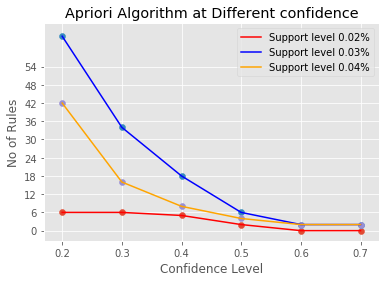

In [24]:
Plot_Rules_Conf_Sup(df)